In [1]:
import time
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from umap_ import *
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objects as go
#import xlsxwriter

sns.set(style='darkgrid', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


In [2]:
baseline = pd.read_pickle("./results/Output files/baseline.pkl")
tr30 = pd.read_pickle("./results/Output files/tr30%.pkl")
tr90 =pd.read_pickle("./results/Output files/tr90%.pkl")
ic2 = pd.read_pickle("./results/Output files/IC2%.pkl")
ic5 = pd.read_pickle("./results/Output files/IC5%.pkl")
rem23 = pd.read_pickle("./results/Output files/remove_23%.pkl")
rem43 = pd.read_pickle("./results/Output files/remove_43%.pkl")
rem74 = pd.read_pickle("./results/Output files/remove_74%.pkl")
cld = pd.read_pickle("./results/Output files/city_lockdown.pkl")
ic10k = pd.read_pickle("./results/Output files/IC10k.pkl")
ic1500 = pd.read_pickle("./results/Output files/IC1500.pkl")
ic100 = pd.read_pickle("./results/Output files/IC100.pkl")

In [5]:
print('baseline: ',baseline.shape)
print('tr30%:',tr30.shape)
print('tr90%:',tr90.shape)
print('ic2%:',ic2.shape)
print('ic5%:',ic5.shape)
print('rem23%:',rem23.shape)
print('rem43%:',rem43.shape)
print('rem74%:',rem74.shape)
print('inter cluster edge removal: ', cld.shape)
print('ic10k:',ic10k.shape)
print('ic1500:',ic1500.shape)
print('ic100:',ic100.shape)

baseline:  (3749394, 5)
tr30%: (3739773, 5)
tr90%: (3749901, 5)
ic2%: (3699578, 5)
ic5%: (3624572, 5)
rem23%: (3749298, 5)
rem43%: (3748506, 5)
rem74%: (3697245, 5)
inter cluster edge removal:  (3281820, 5)
ic10k: (3729560, 5)
ic1500: (3739524, 5)
ic100: (3749393, 5)


In [27]:
print('baseline: ',baseline['t'][baseline["I"].idxmax()])
print('tr30%:',tr30['t'][tr30["I"].idxmax()])
print('tr90%:',tr90['t'][tr90["I"].idxmax()])
print('ic2%:',ic2['t'][ic2["I"].idxmax()])
print('ic5%:',ic5['t'][ic5["I"].idxmax()])
print('rem23%:',rem23['t'][rem23["I"].idxmax()])
print('rem43%:',rem43['t'][rem43["I"].idxmax()])
print('rem74%:',rem74['t'][rem74["I"].idxmax()])
print('inter cluster edge removal: ', cld['t'][cld["I"].idxmax()])
print('ic10k:',ic10k['t'][ic10k["I"].idxmax()])
print('ic1500:',ic1500['t'][ic1500["I"].idxmax()])
print('ic100:',ic100['t'][ic100["I"].idxmax()])

baseline:  68.49697367633469
tr30%: 98.6387528950747
tr90%: 48.25559052916016
ic2%: 7.679347049926947
ic5%: 5.681258094822723
rem23%: 79.37261556754954
rem43%: 84.9571239734642
rem74%: 163.45527671012007
inter cluster edge removal:  72.64220394147837
ic10k: 10.272616391251045
ic1500: 12.828609345131104
ic100: 52.28567725778474


1655644

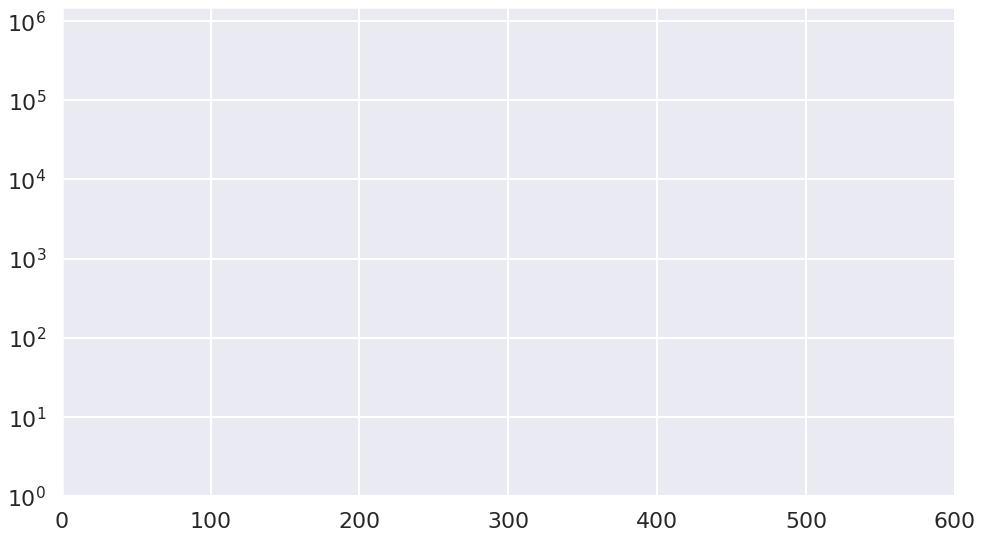

In [40]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy()
ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/blankplot.png')

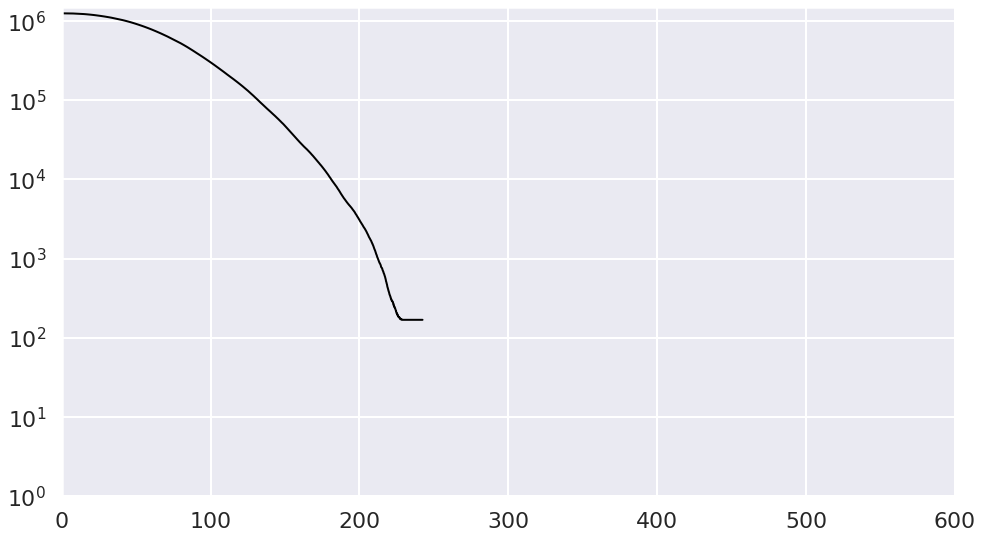

In [9]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =1)
ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/baseline-step1.png')

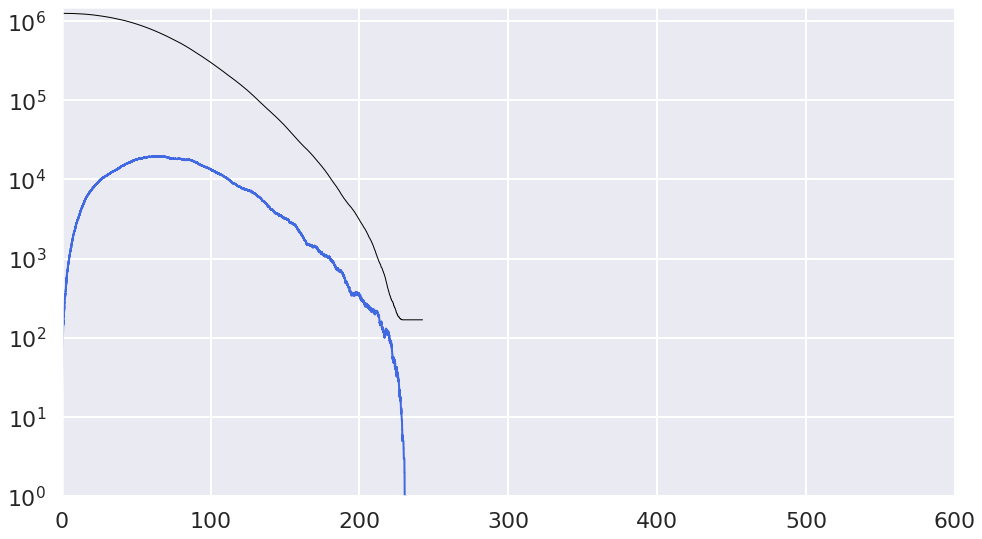

In [10]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1)
plt.semilogy(baseline['t'],baseline['E'], label = 'Susceptible',color= 'royalblue', linewidth = 2, zorder =1)
ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/baseline-step2.png')

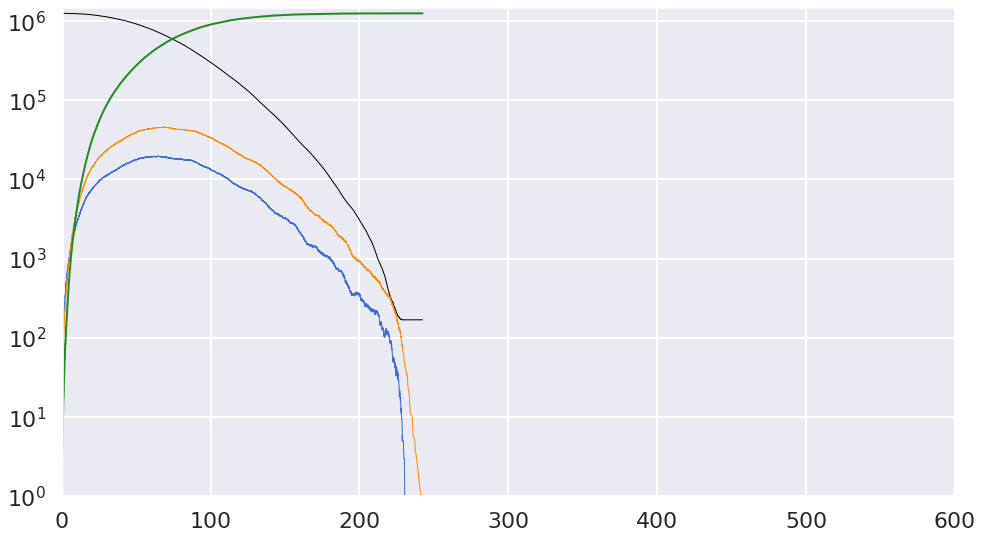

In [12]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1)
plt.semilogy(baseline['t'],baseline['E'], label = 'Susceptible',color= 'royalblue', linewidth = 1, zorder =1)
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1)
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =1)
ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/baseline-step4.png')

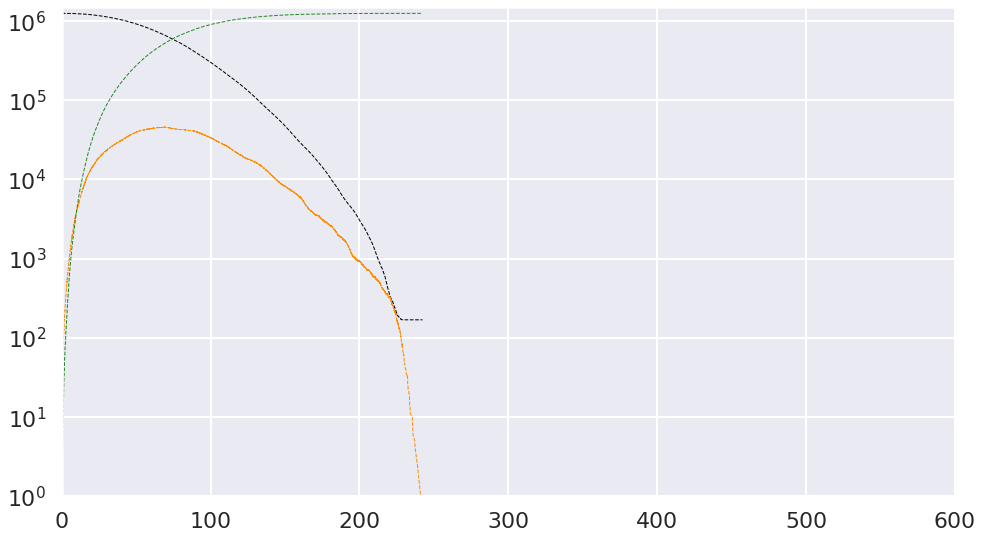

In [16]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/plain_baseline_comparison.png')

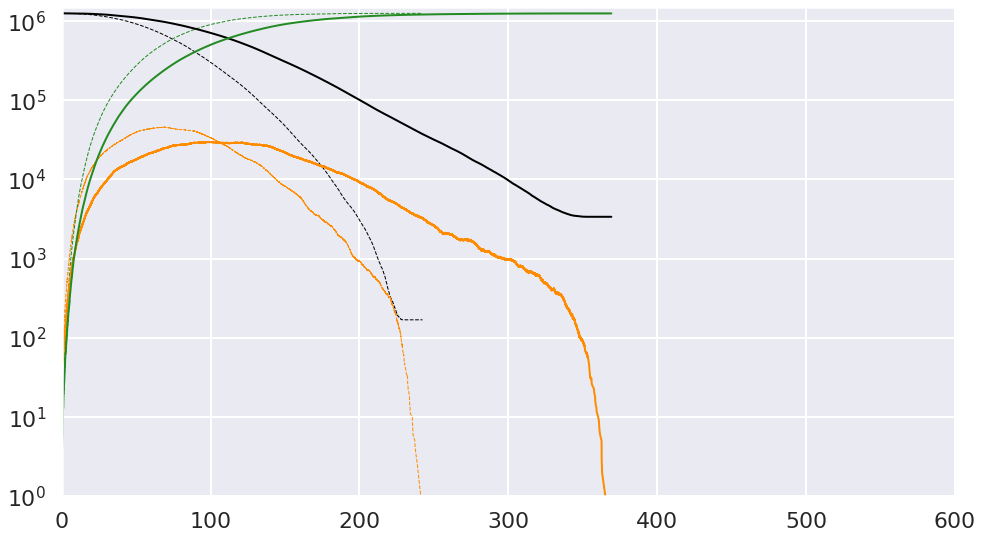

In [9]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(tr30['t'],tr30['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(tr30['t'],tr30['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(tr30['t'],tr30['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/baseline_lockdown.png')

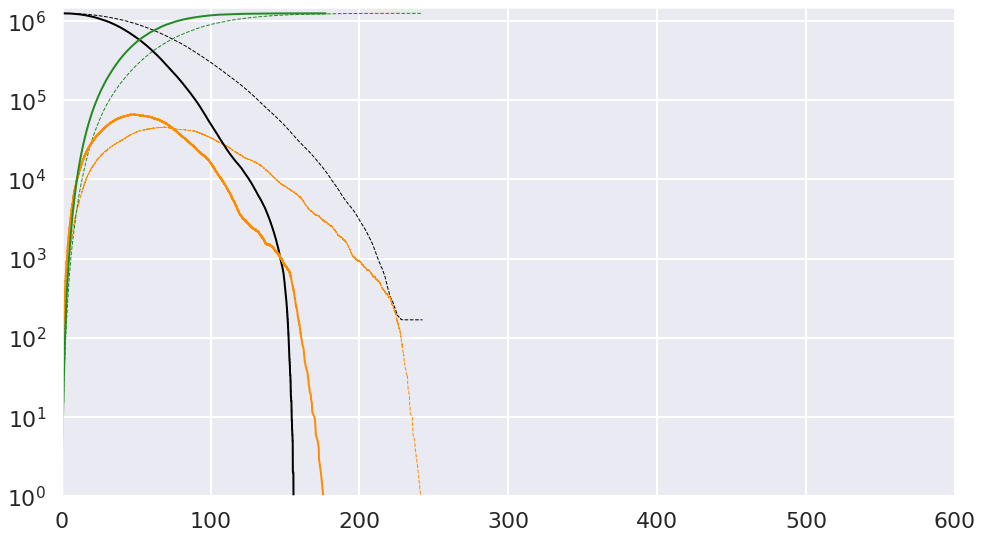

In [18]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(tr90['t'],tr90['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(tr90['t'],tr90['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(tr90['t'],tr90['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/baseline_no_lockdown.png')

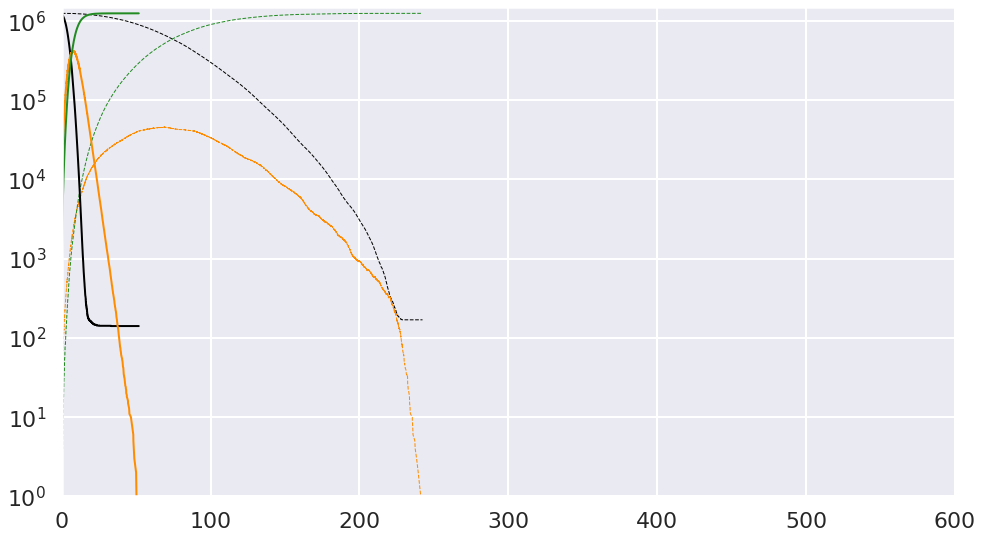

In [6]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(ic2['t'],ic2['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(ic2['t'],ic2['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(ic2['t'],ic2['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/inital_inf_2%.png')

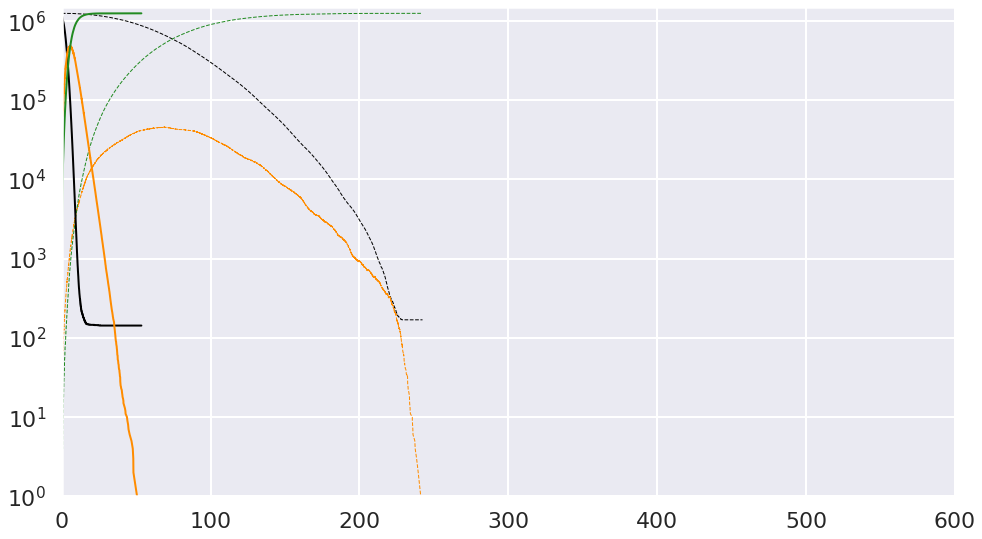

In [7]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(ic5['t'],ic5['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(ic5['t'],ic5['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(ic5['t'],ic5['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/inital_inf_5%.png')

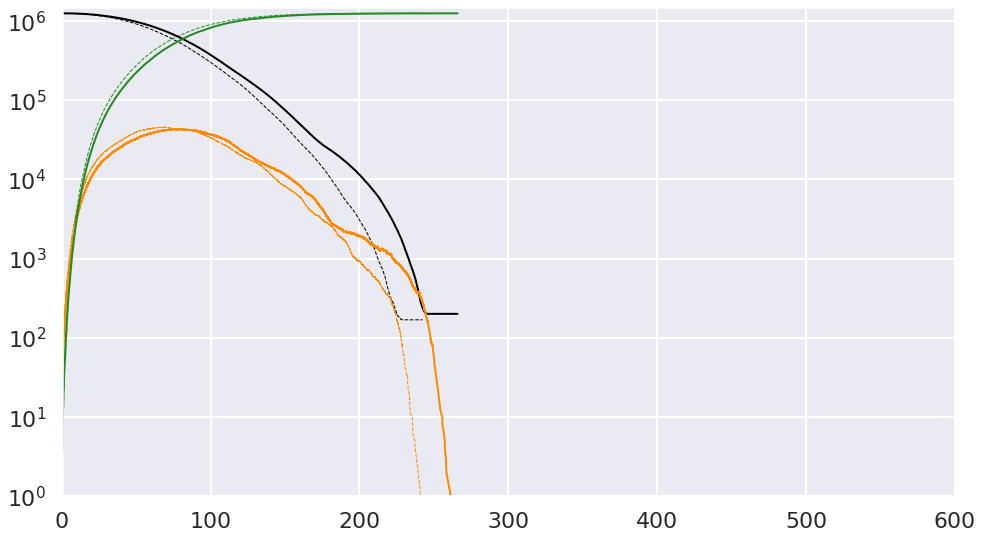

In [8]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(rem23['t'],rem23['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(rem23['t'],rem23['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(rem23['t'],rem23['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/remove_edge_23%.png')

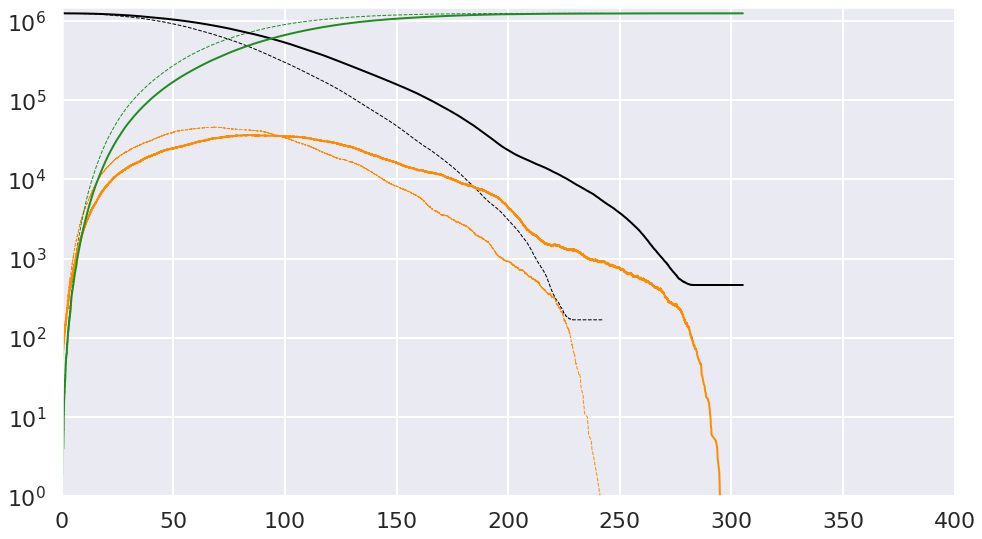

In [6]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(rem43['t'],rem43['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(rem43['t'],rem43['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(rem43['t'],rem43['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 400)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/remove_edge_43%.png')

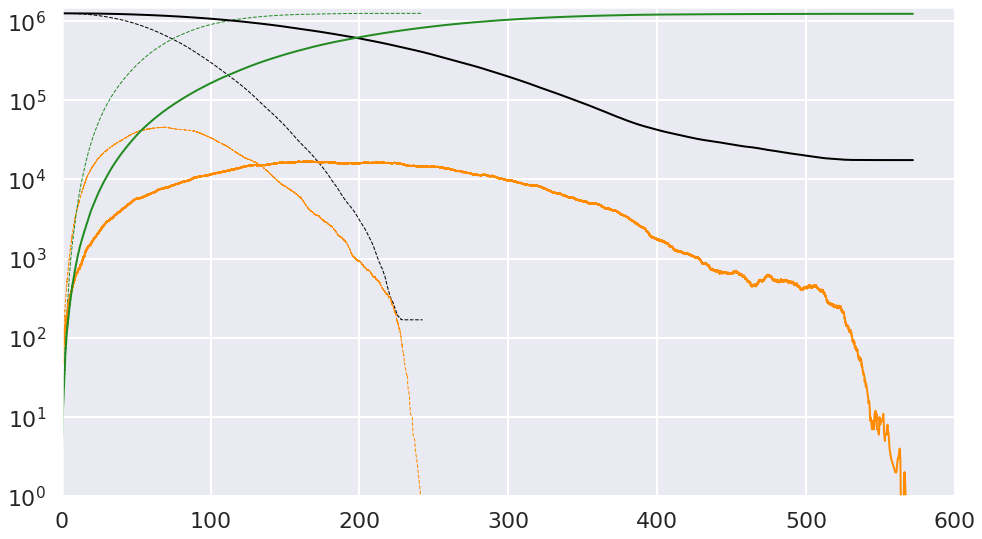

In [10]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(rem74['t'],rem74['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(rem74['t'],rem74['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(rem74['t'],rem74['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 600)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/remove_edge_74%.png')

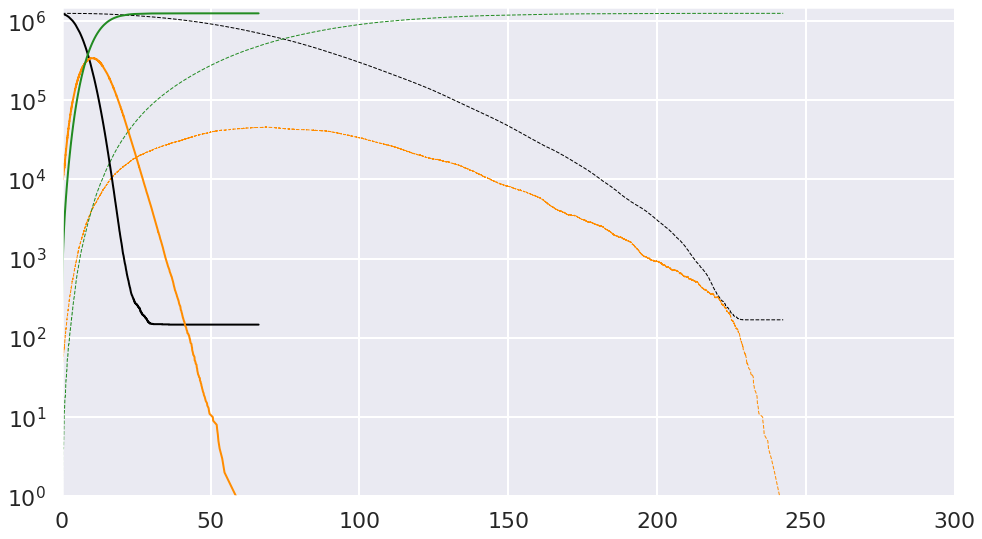

In [4]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(ic10k['t'],ic10k['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(ic10k['t'],ic10k['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(ic10k['t'],ic10k['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 300)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/initial_inf_10k.png')

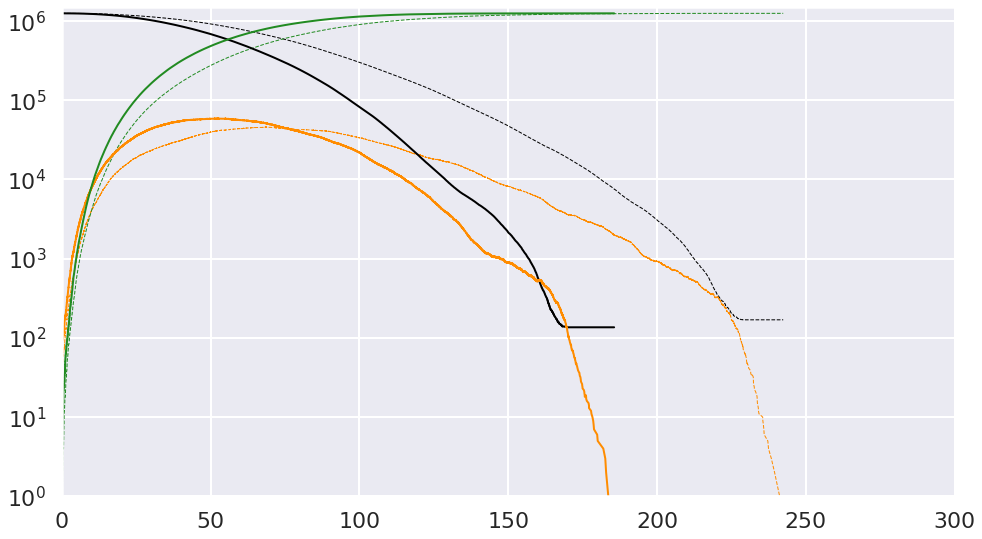

In [8]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(ic100['t'],ic100['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(ic100['t'],ic100['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(ic100['t'],ic100['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 300)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/initial_inf_100.png')

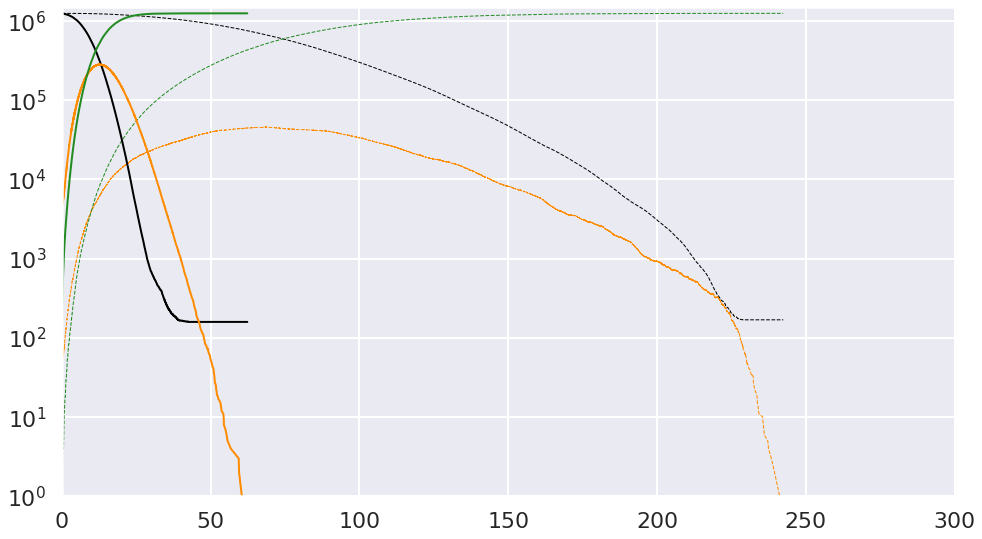

In [5]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(ic1500['t'],ic1500['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(ic1500['t'],ic1500['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(ic1500['t'],ic1500['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 300)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/initial_inf_1500.png')

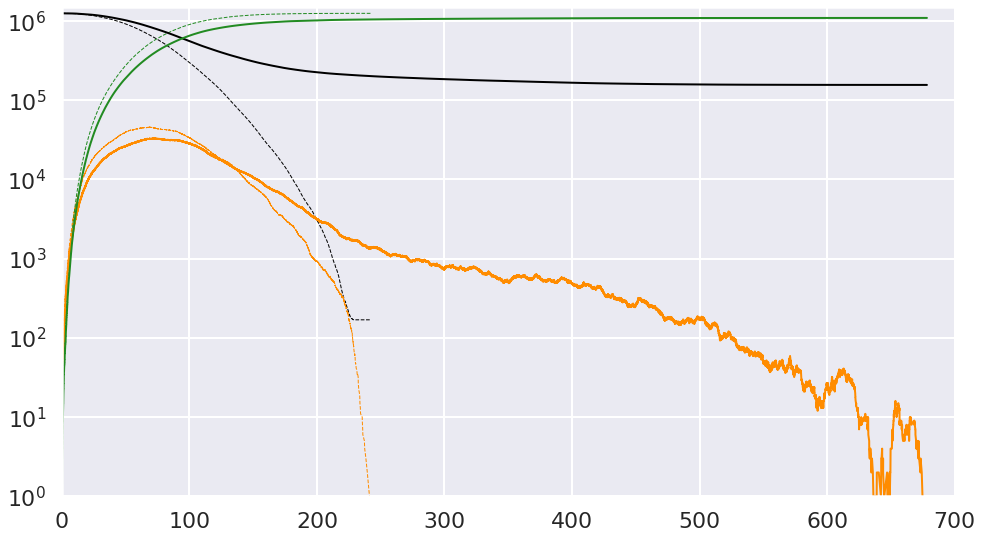

In [4]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

plt.semilogy(cld['t'],cld['S'], label = 'Susceptible',color= 'black', linewidth = 2, zorder =2)
plt.semilogy(cld['t'],cld['I'], label = 'Susceptible',color= 'darkorange', linewidth = 2, zorder =2)
plt.semilogy(cld['t'],cld['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =2)


ax.set_xlim(0, 700)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/city_lockdown.png')

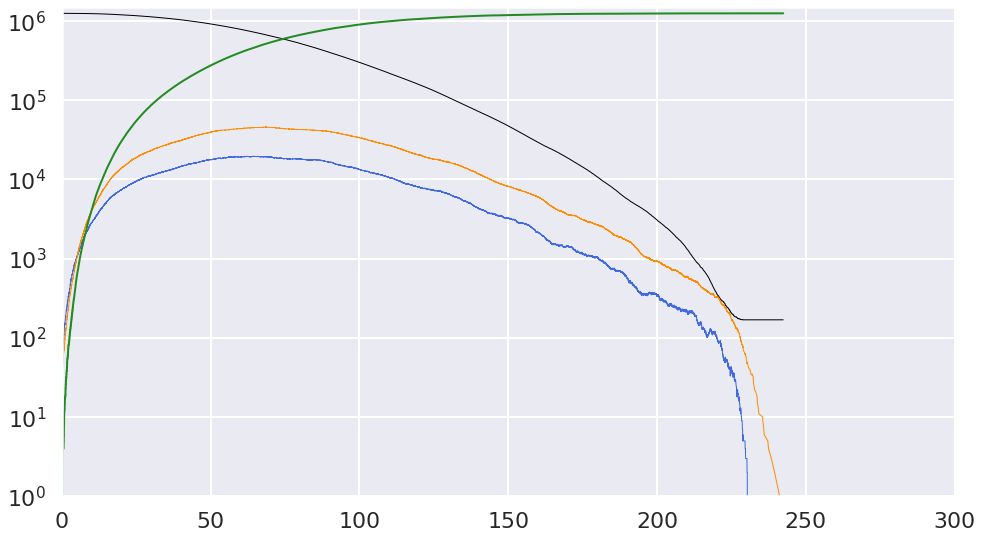

In [3]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1)
plt.semilogy(baseline['t'],baseline['E'], label = 'Susceptible',color= 'royalblue', linewidth = 1, zorder =1)
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1)
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 2, zorder =1)
ax.set_xlim(0, 300)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/baseline-reduced.png')

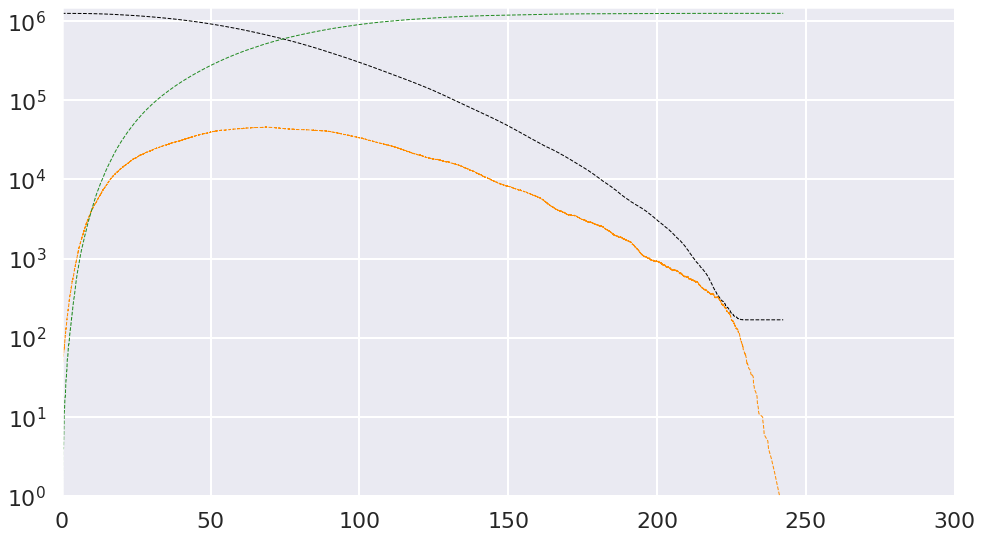

In [4]:
fig, ax = plt.subplots(figsize = (16,9))
plt.semilogy(baseline['t'],baseline['S'], label = 'Susceptible',color= 'black', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['I'], label = 'Susceptible',color= 'darkorange', linewidth = 1, zorder =1, linestyle = 'dashed')
plt.semilogy(baseline['t'],baseline['R'], label = 'Susceptible',color= 'forestgreen', linewidth = 1, zorder =1, linestyle = 'dashed')

ax.set_xlim(0, 300)
ax.set_ylim(1,1500000)
plt.savefig('results/ppt/baseline-reduced-dash.png')